[Google Sheet Calculations](https://docs.google.com/spreadsheets/d/13HdiUNl-4CcNxTaBLHGjJiZh5oAJk_WpKDKY0r7Gng0/edit#gid=1675264535)

- ARIMA
- SARIMA
- p, d, q calculation


In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.tsatools import lagmat
import seaborn as sns
import matplotlib.pyplot as plt

# settings
#plt.style.use("seaborn")
plt.rcParams["figure.figsize"] = (16, 8)

In [16]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [45]:
df=sns.load_dataset('flights')

In [46]:
df

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [48]:
df.dtypes

year             int64
month         category
passengers       int64
dtype: object

In [63]:
df.index = df.apply(lambda x:  str(x['year'])+'-'+x['month'], axis=1) 
df.index = pd.to_datetime(df.index)
df.drop(columns=['year','month'], inplace=True)
df

,passengers
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390


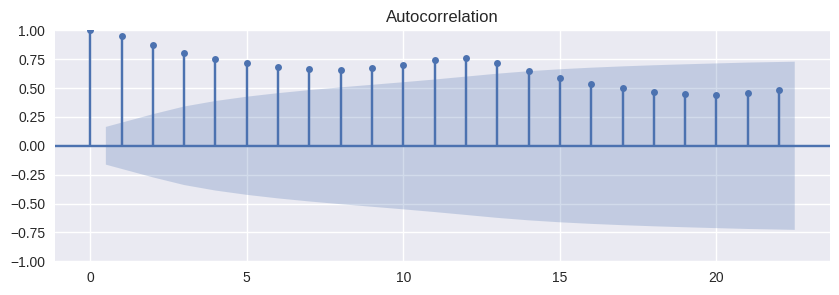

In [75]:
fig, ax = plt.subplots(figsize=(10,3))
plot_acf(df,ax=ax)
plt.show()

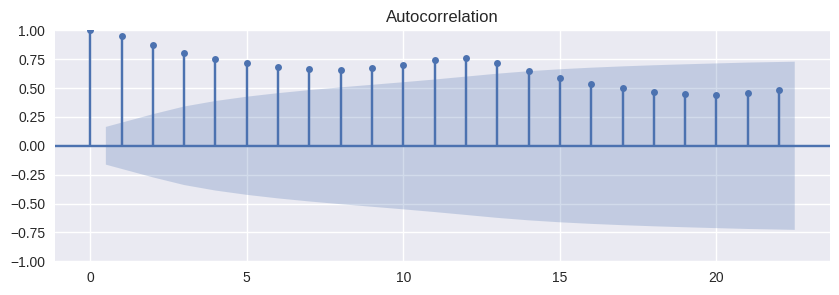

In [112]:
fig, ax = plt.subplots(figsize=(10,3))
plot_acf(df,ax=ax)
plt.show()

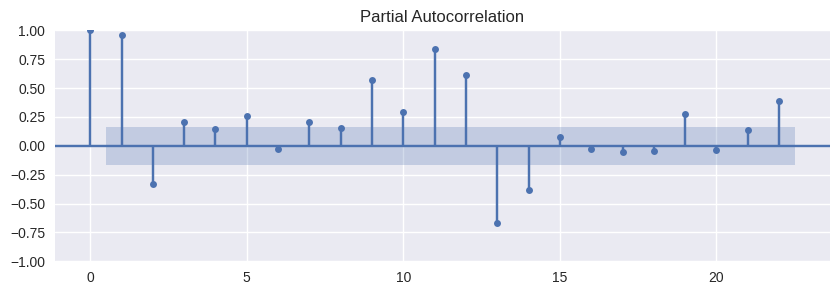

In [77]:
fig, ax = plt.subplots(figsize=(10,3))
plot_pacf(df,ax=ax, method="ols")
plt.show()

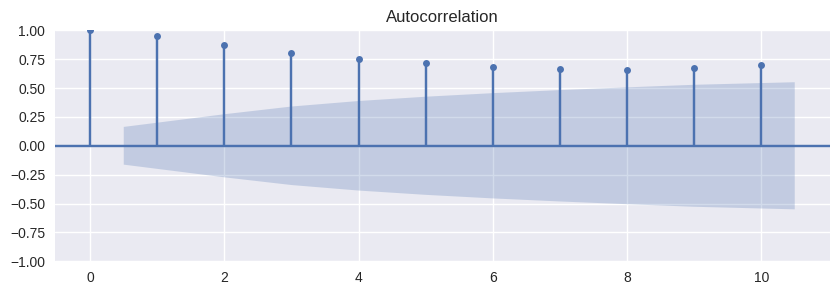

In [83]:
fig, ax = plt.subplots(figsize=(10,3))
plot_acf(df,ax=ax, lags=10)
plt.show()

In [91]:
acf(df, nlags=10)

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992])

In [95]:
acf_df = pd.DataFrame()
for lag in range(0, 11):
    acf_df[f"passengers_lag_{lag}"] = df.shift(lag)

acf_df

,passengers_lag_0,passengers_lag_1,passengers_lag_2,passengers_lag_3,passengers_lag_4,passengers_lag_5,passengers_lag_6,passengers_lag_7,passengers_lag_8,passengers_lag_9,passengers_lag_10
1949-01-01,112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-02-01,118,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-03-01,132,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-04-01,129,132.0,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949-05-01,121,129.0,132.0,118.0,112.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1960-08-01,606,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0
1960-09-01,508,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0
1960-10-01,461,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0
1960-11-01,390,461.0,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0


# ACF

# ACF Formula
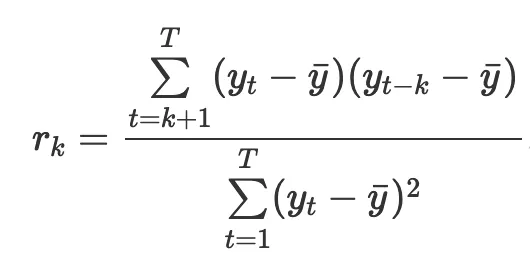

In [97]:
acf_df.corr()["passengers_lag_0"].values

array([1.        , 0.96019465, 0.89567531, 0.83739477, 0.7977347 ,
       0.78594315, 0.7839188 , 0.78459213, 0.79221505, 0.8278519 ,
       0.8827128 ])

In [102]:
acf_list = []
mu = acf_df.passengers_lag_0.mean() 
y = acf_df.passengers_lag_0

for lag in range(0, 11):
    acf_list.append(sum((y - mu).iloc[lag:] * (y.shift(lag) - mu).iloc[lag:]) / sum((y - mu) ** 2))

np.array(acf_list)

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992])

# PACF

# PACF Formula
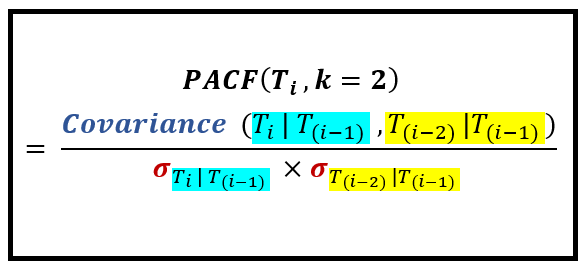

In [103]:
pacf(df, nlags=10, method="ols")

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358])

In [104]:
N_LAGS = 10

# the first partial autocorrelation is always equal to 1
pacf_list = [1]

X = pd.DataFrame(lagmat(y, N_LAGS))
X.columns = [f"lag_{lag+1}" for lag in range(10)]

for k in range(1, N_LAGS + 1):
    fitted_model = LinearRegression().fit(X.iloc[k:, :k], 
                                          y.iloc[k:])
    pacf_list.append(fitted_model.coef_[-1])

np.array(pacf_list)

array([ 1.        ,  0.95893198, -0.32983096,  0.2018249 ,  0.14500798,
        0.25848232, -0.02690283,  0.20433019,  0.15607896,  0.56860841,
        0.29256358])

In [118]:
fitted_model.coef_

array([ 1.06372195, -0.39838349,  0.14604013, -0.29677475,  0.34583469,
       -0.18144547,  0.22161116, -0.39783113,  0.21977501,  0.29256358])

In [119]:
X.columns

Index(['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7', 'lag_8',
       'lag_9', 'lag_10'],
      dtype='object')

In [113]:
X

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,118.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,132.0,118.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,129.0,132.0,118.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
139,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0,407.0
140,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0,362.0
141,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0
142,461.0,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0
